# quantifying shakespeare

In this notebook we will find the frequencies with which shakespeare's words used letters.

In [28]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file return a list of its lines."""
    lines: list[str]= []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        if line != "":
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./wordle.txt")
print(len(shakespeare_lines))

12972


The next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter.

In [29]:
# goal: define a function named `tally` 
# Give the function a dictionaary reference [str, int] and a key
# if the key is in the dictionary, increase the value by 1
# otherwise, set the keys value to 1
# returns none

def tally(data: dict[str, int], key: str) -> None:
    """mutate counts to increment a key by 1 if it exists, or initialize to 1."""
    if key in data:
        data[key] += 1
    else: 
        data[key] = 1
    return None


def count_letters(lines: list[str]) -> dict[str, int]:
    """count frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    # loop through all lines
    # for each line loop through all characters
    # tally character into count dictionary 
    # challenge: tally only letters
    for line in shakespeare_lines:
        for letter in line:
            if letter >= "a" and letter <= "z":
                tally(counts, letter)
    return counts

shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'a': 5990, 'h': 1760, 'e': 6662, 'd': 2453, 'l': 3371, 'i': 3759, 'r': 4158, 'g': 1644, 't': 3295, 'b': 1627, 'c': 2028, 'k': 1505, 's': 6665, 'f': 1115, 'm': 1976, 'p': 2019, 'n': 2952, 'y': 2074, 'o': 4438, 'w': 1039, 'u': 2511, 'v': 694, 'z': 434, 'x': 288, 'j': 291, 'q': 112}


let's create a visualization of this data with a bar chart

In [30]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict: sorted(items_in_dict)
sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 5990, 'h': 1760, 'e': 6662, 'd': 2453, 'l': 3371, 'i': 3759, 'r': 4158, 'g': 1644, 't': 3295, 'b': 1627, 'c': 2028, 'k': 1505, 's': 6665, 'f': 1115, 'm': 1976, 'p': 2019, 'n': 2952, 'y': 2074, 'o': 4438, 'w': 1039, 'u': 2511, 'v': 694, 'z': 434, 'x': 288, 'j': 291, 'q': 112}


['a', 'h', 'e', 'd', 'l', 'i', 'r', 'g', 't', 'b', 'c', 'k', 's', 'f', 'm', 'p', 'n', 'y', 'o', 'w', 'u', 'v', 'z', 'x', 'j', 'q']
[5990, 1760, 6662, 2453, 3371, 3759, 4158, 1644, 3295, 1627, 2028, 1505, 6665, 1115, 1976, 2019, 2952, 2074, 4438, 1039, 2511, 694, 434, 288, 291, 112]


<BarContainer object of 26 artists>

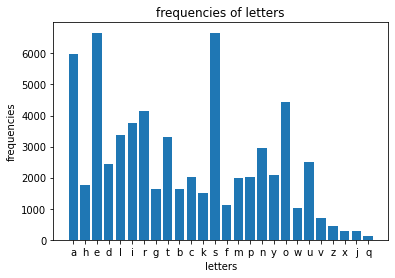

In [31]:
from matplotlib import pyplot

pyplot.title("frequencies of letters")
pyplot.xlabel("letters")
pyplot.ylabel("frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
print(labels)
print(values)
pyplot.bar(labels, values)
